# Interact with angular distributions in ENDF-6 format (MF=4)

First import `sandy` and other python packages for formatting and postprocessing that are used in this notebook.

> Notice that, for the moment, `sandy` only provide interaction capabilities for angular distributions 
> expressed as Legendre polynomial coefficients (lpc).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import sandy

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
sns.set_style("whitegrid")

pd.options.display.float_format = '{:.5e}'.format

%matplotlib

Using matplotlib backend: Qt5Agg


## Extract from ENDF-6 file

Now, create a `endf6` instance from the ENDF-6 file `"fe56_lpc.endf"`, 
which was pre-edited to remove all content except the elastic scattering angular distribution (MF=4, MT=2) 
and the info section. 

In [2]:
tape = sandy.Endf6.from_file("fe56_lpc.endf")
tape

MAT   MF  MT 
2631  1   451     2.605600+4 5.545440+1          1          0  ...
      4   2       2.605600+4 5.545440+1          0          3  ...
Name: fe56_lpc.endf, dtype: object

In [3]:
nrows = 10
ncolumns = 81

print(tape.data[2631,4,2][:ncolumns * nrows])

 2.605600+4 5.545440+1          0          3          0          02631 4  2    1
 0.000000+0 5.545440+1          0          2          0          02631 4  2    2
 0.000000+0 0.000000+0          0          0          1       17822631 4  2    3
       1782          2                                            2631 4  2    4
 0.000000+0 1.000000-5          0          0          4          02631 4  2    5
 0.000000+0 0.000000+0 0.000000+0 0.000000+0                      2631 4  2    6
 0.000000+0 1.584600+3          0          0          4          02631 4  2    7
 0.000000+0 0.000000+0 0.000000+0 0.000000+0                      2631 4  2    8
 0.000000+0 1.170900+4          0          0          4          02631 4  2    9
 1.114400-2 2.867900-5-6.457300-8 1.40440-11                      2631 4  2   10



In [4]:
mat = tape.mat[0]
mf = 4
mt = 2

section = tape.read_section(mat, mf, mt)

Class `sandy.Lpc` can be used to parse MF=4 and extract the legendre polynomial coefficients into variable `lpc`.

In [5]:
lpc = sandy.Lpc.from_endf6(tape)
lpc.data.head() # print first 5 rows of dataframe
lpc.data.tail() # print last 5 rows of dataframe

P                            0            1            2            3   \
MAT  MT E                                                                
2631 2  1.00000e-05 1.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00   
        1.58460e+03 1.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00   
        1.17090e+04 1.00000e+00  1.11440e-02  2.86790e-05 -6.45730e-08   
        1.50340e+04 1.00000e+00 -4.58040e-03 -1.47030e-04  1.74240e-07   
        1.93050e+04 1.00000e+00  2.28420e-02 -5.43220e-03 -9.25960e-05   

P                            4           5           6           7   \
MAT  MT E                                                             
2631 2  1.00000e-05 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00   
        1.58460e+03 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00   
        1.17090e+04 1.40440e-11 0.00000e+00 0.00000e+00 0.00000e+00   
        1.50340e+04 2.90070e-10 0.00000e+00 0.00000e+00 0.00000e+00   
        1.93050e+04 2.79840e-07 0.00000e+00 0.00000e+00 0.00000e+00   

P                            8           9   ...          11          12  \
MAT  MT E                                    ...                           
2631 2  1.00000e-05 0.00000e+00 0.00000e+00  ... 0.00000e+00 0.00000e+00   
        1.58460e+03 0.00000e+00 0.00000e+00  ... 0.00000e+00 0.00000e+00   
        1.17090e+04 0.00000e+00 0.00000e+00  ... 0.00000e+00 0.00000e+00   
        1.50340e+04 0.00000e+00 0.00000e+00  ... 0.00000e+00 0.00000e+00   
        1.93050e+04 0.00000e+00 0.00000e+00  ... 0.00000e+00 0.00000e+00   

P                            13          14          15          16  \
MAT  MT E                                                             
2631 2  1.00000e-05 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00   
        1.58460e+03 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00   
        1.17090e+04 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00   
        1.50340e+04 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00   
        1.93050e+04 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00   

P                            17          18          19          20  
MAT  MT E                                                            
2631 2  1.00000e-05 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00  
        1.58460e+03 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00  
        1.17090e+04 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00  
        1.50340e+04 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00  
        1.93050e+04 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00  

[5 rows x 21 columns]

P                            0           1           2           3   \
MAT  MT E                                                             
2631 2  1.80000e+07 1.00000e+00 8.21540e-01 6.93540e-01 5.98950e-01   
        1.85000e+07 1.00000e+00 8.20250e-01 6.89640e-01 5.95710e-01   
        1.90000e+07 1.00000e+00 8.19340e-01 6.86190e-01 5.92550e-01   
        1.95000e+07 1.00000e+00 8.18830e-01 6.83240e-01 5.89540e-01   
        2.00000e+07 1.00000e+00 8.18730e-01 6.80810e-01 5.86720e-01   

P                            4           5           6           7   \
MAT  MT E                                                             
2631 2  1.80000e+07 5.18790e-01 4.26990e-01 3.40440e-01 2.64590e-01   
        1.85000e+07 5.18660e-01 4.30970e-01 3.48240e-01 2.73510e-01   
        1.90000e+07 5.18140e-01 4.34340e-01 3.55260e-01 2.81850e-01   
        1.95000e+07 5.17300e-01 4.37140e-01 3.61510e-01 2.89570e-01   
        2.00000e+07 5.16200e-01 4.39420e-01 3.66990e-01 2.96650e-01   

P                            8           9   ...          11          12  \
MAT  MT E                                    ...                           
2631 2  1.80000e+07 2.05710e-01 1.37410e-01  ... 3.03740e-02 1.11880e-02   
        1.85000e+07 2.15080e-01 1.46970e-01  ... 3.47960e-02 1.31510e-02   
        1.90000e+07 2.23840e-01 1.56220e-01  ... 3.94820e-02 1.52910e-02   
        1.95000e+07 2.31950e-01 1.65070e-01  ... 4.43810e-02 1.75940e-02   
        2.00000e+07 2.39420e-01 1.73460e-01  ... 4.94380e-02 2.00420e-02   

P                            13          14          15          16  \
MAT  MT E                                                             
2631 2  1.80000e+07 3.48700e-03 9.96120e-04 2.70090e-04 7.29360e-05   
        1.85000e+07 4.19560e-03 1.22570e-03 3.38860e-04 9.24890e-05   
        1.90000e+07 4.99100e-03 1.49080e-03 4.20250e-04 1.16140e-04   
        1.95000e+07 5.87300e-03 1.79320e-03 5.15470e-04 1.44420e-04   
        2.00000e+07 6.83960e-03 2.13430e-03 6.25610e-04 1.77860e-04   

P                            17          18          19          20  
MAT  MT E                                                            
2631 2  1.80000e+07 2.20630e-05 9.77590e-06 7.13560e-06 0.00000e+00  
        1.85000e+07 2.74920e-05 1.13290e-05 7.65150e-06 0.00000e+00  
        1.90000e+07 3.41760e-05 1.32530e-05 8.27370e-06 0.00000e+00  
        1.95000e+07 4.23120e-05 1.56160e-05 9.02390e-06 0.00000e+00  
        2.00000e+07 5.21110e-05 1.84890e-05 9.92440e-06 0.00000e+00  

[5 rows x 21 columns]

## Convert Legendre poynomial coefficients into distibutions tabulated over cosine 

Legendre polynomials are a good way to store most of the angular distribution information in just a few coefficients.

However, for analyses or plotting purposes, one could be interested in having the angular distributions 
tabulated oven a cosine grid.

Legendre polynomial coefficients can be easily converted into tabulated probability distributions using method `.to_tpd`.
Here the method's output is stored in variabe `tpd`.
Then, the tabulated distributions can be accessed via attribute `.data` as a `pandas.DataFrame`.

By default the distributions are tabulated over 101 cosine bins equally spaced between -1 and 1.
Should we want more bins, say 201, we should pass argument `cosines=np.linspace(-1, 1, 201)` to `.to_tpd`.

In [6]:
tpd = lpc.to_tpd()
tpd.data.head()

COSINE               -1.00000e+00  -9.80000e-01  -9.60000e-01  -9.40000e-01  \
MAT  MT E                                                                     
2631 2  1.00000e-05   5.00000e-01   5.00000e-01   5.00000e-01   5.00000e-01   
        1.58460e+03   5.00000e-01   5.00000e-01   5.00000e-01   5.00000e-01   
        1.17090e+04   4.83356e-01   4.83686e-01   4.84016e-01   4.84346e-01   
        1.50340e+04   5.06502e-01   5.06387e-01   5.06271e-01   5.06155e-01   
        1.93050e+04   4.52482e-01   4.53936e-01   4.55375e-01   4.56800e-01   

COSINE               -9.20000e-01  -9.00000e-01  -8.80000e-01  -8.60000e-01  \
MAT  MT E                                                                     
2631 2  1.00000e-05   5.00000e-01   5.00000e-01   5.00000e-01   5.00000e-01   
        1.58460e+03   5.00000e-01   5.00000e-01   5.00000e-01   5.00000e-01   
        1.17090e+04   4.84677e-01   4.85007e-01   4.85337e-01   4.85668e-01   
        1.50340e+04   5.06038e-01   5.05920e-01   5.05803e-01   5.05685e-01   
        1.93050e+04   4.58211e-01   4.59607e-01   4.60988e-01   4.62355e-01   

COSINE               -8.40000e-01  -8.20000e-01  ...  8.20000e-01   \
MAT  MT E                                        ...                 
2631 2  1.00000e-05   5.00000e-01   5.00000e-01  ...   5.00000e-01   
        1.58460e+03   5.00000e-01   5.00000e-01  ...   5.00000e-01   
        1.17090e+04   4.85999e-01   4.86329e-01  ...   5.13744e-01   
        1.50340e+04   5.05566e-01   5.05447e-01  ...   4.94179e-01   
        1.93050e+04   4.63707e-01   4.65045e-01  ...   5.21140e-01   

COSINE               8.40000e-01   8.60000e-01   8.80000e-01   9.00000e-01   \
MAT  MT E                                                                     
2631 2  1.00000e-05   5.00000e-01   5.00000e-01   5.00000e-01   5.00000e-01   
        1.58460e+03   5.00000e-01   5.00000e-01   5.00000e-01   5.00000e-01   
        1.17090e+04   5.14081e-01   5.14419e-01   5.14757e-01   5.15096e-01   
        1.50340e+04   4.94024e-01   4.93867e-01   4.93711e-01   4.93554e-01   
        1.93050e+04   5.21126e-01   5.21093e-01   5.21042e-01   5.20974e-01   

COSINE               9.20000e-01   9.40000e-01   9.60000e-01   9.80000e-01   \
MAT  MT E                                                                     
2631 2  1.00000e-05   5.00000e-01   5.00000e-01   5.00000e-01   5.00000e-01   
        1.58460e+03   5.00000e-01   5.00000e-01   5.00000e-01   5.00000e-01   
        1.17090e+04   5.15434e-01   5.15772e-01   5.16110e-01   5.16449e-01   
        1.50340e+04   4.93397e-01   4.93239e-01   4.93080e-01   4.92922e-01   
        1.93050e+04   5.20887e-01   5.20782e-01   5.20660e-01   5.20519e-01   

COSINE               1.00000e+00   
MAT  MT E                          
2631 2  1.00000e-05   5.00000e-01  
        1.58460e+03   5.00000e-01  
        1.17090e+04   5.16787e-01  
        1.50340e+04   4.92762e-01  
        1.93050e+04   5.20360e-01  

[5 rows x 101 columns]

We can check that all distributions are normalized to one by calling property `.integrals`.

In [7]:
tpd.integrals.head()

MAT   MT  E          
2631  2   1.00000e-05   1.00000e+00
          1.58460e+03   1.00000e+00
          1.17090e+04   1.00000e+00
          1.50340e+04   1.00000e+00
          1.93050e+04   9.99997e-01
Name: integral, dtype: float64

## Plotting

Let's try and make some plots!

For instance, we can plot the Legendre polynomial coefficients from P0 to P6  as a function of energy. 

We start by selecting the material and reaction numbers...

In [8]:
mat = 2631
mt = 2

Here, we define the order of the highest polynomial that we want to consider, i.e. 6.

In [9]:
pmax = 6

Plotting with `pandas` is straightforward.

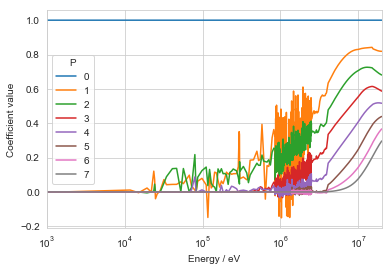

In [10]:
lpc.data.loc[(mat,mt), :pmax+1].plot(logx=True);
plt.xlim([1e3, 2e7]);
plt.xlabel("Energy / eV");
plt.ylabel("Coefficient value");

We can also plot the tabulated distribution that we created before and stored in variable `tpd`!

What we have to do is to select the energy values of interest for us (in eV).

Make sure that these values exist for the given reaction.
You can always check it by printinf the index `tpd.data.loc[(mat,mt)].index`. 

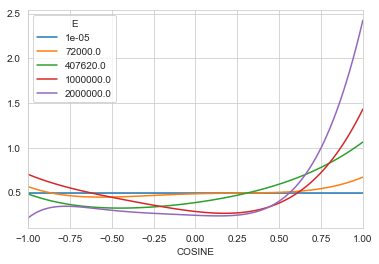

In [11]:
energies = [1e-5, 72000.0, 407620.0, 1000000.0, 2000000]
tpd.data.loc[(mat,mt)].loc[energies].T.plot();

## Write to ENDF-6 file

Suppose we applied modifiations to our object `lpc` and we would like to test what we changed in our daily reactor simulations.

First we need to reinsert the Legendre polynomial coeffcients in `lpc` back into the endf6 tape object `tape`.

In [12]:
tape1 = lpc.to_endf6(tape)

Notice that a new endf6 object `tape1` was created.

Below we test that the Legendre polynomial coeffcients in `tape1` are exactly the same as those in `lpc`.

In [13]:
lpc1 = sandy.Lpc.from_endf6(tape1)

lcols = lpc1.data.shape[1]
pd.testing.assert_frame_equal(lpc1.data.iloc[:,:lcols], lpc.data.iloc[:,:lcols])

Last steps, write first the `endf6` object content into a string using method `write_string`, 
then open a new file and dump the string into it.

In [14]:
string = tape1.write_string()

newfile = "new_lpc.endf"
with open(newfile, "w") as f:
    ncharacters = f.write(string)

If you open the ASCII file `"new_lpc.endf"` you'll see that it is formatted according to the ENDF-6 rules and 
that it contains the same information that was initially retained in object `lpc`.

## Change energy grid of the coefficients 

Legendre polynomial coeffcients are reported in the ENDF-6 format over a number of incident neutron energies.
For several reasons (including applying perturbations to such coeffcients, as we will see later in the tutorial) 
we might be interested in extending this energy grid by adding some extra points.
This can be done using method `.reshape`, to which the additional energy points are passed.

> Notice that the new `sandy.Lpc` instance that is returned by this method contains 
> Legendre polynomial coefficients that are tabulated over the union of the original 
> grid and the additional energy points.

In [15]:
lpc.reshape([1e0, 6646.8, 14065.4523924601]).data.head(10)

P                            0            1            2            3   \
MAT  MT E                                                                
2631 2  1.00000e-05 1.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00   
        1.00000e+00 1.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00   
        1.58460e+03 1.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00   
        6.64680e+03 1.00000e+00  5.57200e-03  1.43395e-05 -3.22865e-08   
        1.17090e+04 1.00000e+00  1.11440e-02  2.86790e-05 -6.45730e-08   
        1.40655e+04 1.00000e+00  1.21431e-16 -9.58473e-05  1.04676e-07   
        1.50340e+04 1.00000e+00 -4.58040e-03 -1.47030e-04  1.74240e-07   
        1.93050e+04 1.00000e+00  2.28420e-02 -5.43220e-03 -9.25960e-05   
        2.18750e+04 1.00000e+00 -6.43930e-04 -2.55650e-04  6.12790e-07   
        2.35790e+04 1.00000e+00  1.21020e-01  4.11800e-03 -2.24810e-05   

P                            4           5           6           7   \
MAT  MT E                                                             
2631 2  1.00000e-05 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00   
        1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00   
        1.58460e+03 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00   
        6.64680e+03 7.02200e-12 0.00000e+00 0.00000e+00 0.00000e+00   
        1.17090e+04 1.40440e-11 0.00000e+00 0.00000e+00 0.00000e+00   
        1.40655e+04 2.09666e-10 0.00000e+00 0.00000e+00 0.00000e+00   
        1.50340e+04 2.90070e-10 0.00000e+00 0.00000e+00 0.00000e+00   
        1.93050e+04 2.79840e-07 0.00000e+00 0.00000e+00 0.00000e+00   
        2.18750e+04 6.91230e-10 0.00000e+00 0.00000e+00 0.00000e+00   
        2.35790e+04 2.20890e-08 0.00000e+00 0.00000e+00 0.00000e+00   

P                            8           9   ...          11          12  \
MAT  MT E                                    ...                           
2631 2  1.00000e-05 0.00000e+00 0.00000e+00  ... 0.00000e+00 0.00000e+00   
        1.00000e+00 0.00000e+00 0.00000e+00  ... 0.00000e+00 0.00000e+00   
        1.58460e+03 0.00000e+00 0.00000e+00  ... 0.00000e+00 0.00000e+00   
        6.64680e+03 0.00000e+00 0.00000e+00  ... 0.00000e+00 0.00000e+00   
        1.17090e+04 0.00000e+00 0.00000e+00  ... 0.00000e+00 0.00000e+00   
        1.40655e+04 0.00000e+00 0.00000e+00  ... 0.00000e+00 0.00000e+00   
        1.50340e+04 0.00000e+00 0.00000e+00  ... 0.00000e+00 0.00000e+00   
        1.93050e+04 0.00000e+00 0.00000e+00  ... 0.00000e+00 0.00000e+00   
        2.18750e+04 0.00000e+00 0.00000e+00  ... 0.00000e+00 0.00000e+00   
        2.35790e+04 0.00000e+00 0.00000e+00  ... 0.00000e+00 0.00000e+00   

P                            13          14          15          16  \
MAT  MT E                                                             
2631 2  1.00000e-05 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00   
        1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00   
        1.58460e+03 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00   
        6.64680e+03 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00   
        1.17090e+04 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00   
        1.40655e+04 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00   
        1.50340e+04 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00   
        1.93050e+04 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00   
        2.18750e+04 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00   
        2.35790e+04 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00   

P                            17          18          19          20  
MAT  MT E                                                            
2631 2  1.00000e-05 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00  
        1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00  
        1.58460e+03 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00  
        6.64680e+03 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00  
        1.17090e+04 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00  
  

## Apply custom perturbations to Legendre polynomial coefficients

Custom energy-dependent perturbations can be applied to specific Legendre polynomial coefficients.

In the following example we increase the P1 coefficient of Fe56*(n,n)* by 10% for neutron energies between 10 and 20 MeV.
At the same time, we also reduce the P2 coefficient of the same reaction by 30% over all energies lower than 20 MeV.
The two tabulated perturbation coefficients are stored in variables `pert_p1` and `pert_p2`, respectively.

> To learn how to produce energy-dependent tabulated **perturbation coefficients** with `sandy` 
> you can check [this tutorial](files/pert_notebook.ipynb).

In [16]:
pert_p1 = sandy.Pert(pd.Series([1, 1.1], index=[1e7, 2e7]))
pert_p2 = sandy.Pert(pd.Series([0.7], index=[2e7]))

Now, the perturbations are applied in sequence to the `sandy.Lpc` instance using method `.custom_perturbation`.

In [17]:
lpc1 = lpc.custom_perturbation(mat, mt, 1, pert_p1).custom_perturbation(mat, mt, 2, pert_p2)

A new object `lpc1` is created and the content of its `data` attribute is dispayed below.

In [18]:
lpc1.data.tail(10)

P                            0           1           2           3   \
MAT  MT E                                                             
2631 2  1.55000e+07 1.00000e+00 9.15904e-01 5.01746e-01 6.13440e-01   
        1.60000e+07 1.00000e+00 9.12989e-01 4.98414e-01 6.11120e-01   
        1.65000e+07 1.00000e+00 9.10228e-01 4.95026e-01 6.08390e-01   
        1.70000e+07 1.00000e+00 9.07720e-01 4.91680e-01 6.05370e-01   
        1.75000e+07 1.00000e+00 9.05531e-01 4.88474e-01 6.02190e-01   
        1.80000e+07 1.00000e+00 9.03694e-01 4.85478e-01 5.98950e-01   
        1.85000e+07 1.00000e+00 9.02275e-01 4.82748e-01 5.95710e-01   
        1.90000e+07 1.00000e+00 9.01274e-01 4.80333e-01 5.92550e-01   
        1.95000e+07 1.00000e+00 9.00713e-01 4.78268e-01 5.89540e-01   
        2.00000e+07 1.00000e+00 9.00603e-01 4.76567e-01 5.86720e-01   

P                            4           5           6           7   \
MAT  MT E                                                             
2631 2  1.55000e+07 5.11550e-01 3.97110e-01 2.91630e-01 2.13080e-01   
        1.60000e+07 5.14230e-01 4.04500e-01 3.02500e-01 2.24110e-01   
        1.65000e+07 5.16240e-01 4.11150e-01 3.12880e-01 2.34830e-01   
        1.70000e+07 5.17630e-01 4.17100e-01 3.22710e-01 2.45190e-01   
        1.75000e+07 5.18460e-01 4.22370e-01 3.31920e-01 2.55130e-01   
        1.80000e+07 5.18790e-01 4.26990e-01 3.40440e-01 2.64590e-01   
        1.85000e+07 5.18660e-01 4.30970e-01 3.48240e-01 2.73510e-01   
        1.90000e+07 5.18140e-01 4.34340e-01 3.55260e-01 2.81850e-01   
        1.95000e+07 5.17300e-01 4.37140e-01 3.61510e-01 2.89570e-01   
        2.00000e+07 5.16200e-01 4.39420e-01 3.66990e-01 2.96650e-01   

P                            8           9   ...          11          12  \
MAT  MT E                                    ...                           
2631 2  1.55000e+07 1.51850e-01 8.82620e-02  ... 1.32790e-02 4.19890e-03   
        1.60000e+07 1.63310e-01 9.79430e-02  ... 1.59850e-02 5.22990e-03   
        1.65000e+07 1.74510e-01 1.07790e-01  ... 1.90490e-02 6.43660e-03   
        1.70000e+07 1.85370e-01 1.17730e-01  ... 2.24760e-02 7.82890e-03   
        1.75000e+07 1.95790e-01 1.27630e-01  ... 2.62570e-02 9.41250e-03   
        1.80000e+07 2.05710e-01 1.37410e-01  ... 3.03740e-02 1.11880e-02   
        1.85000e+07 2.15080e-01 1.46970e-01  ... 3.47960e-02 1.31510e-02   
        1.90000e+07 2.23840e-01 1.56220e-01  ... 3.94820e-02 1.52910e-02   
        1.95000e+07 2.31950e-01 1.65070e-01  ... 4.43810e-02 1.75940e-02   
        2.00000e+07 2.39420e-01 1.73460e-01  ... 4.94380e-02 2.00420e-02   

P                            13          14          15          16  \
MAT  MT E                                                             
2631 2  1.55000e+07 1.15060e-03 2.92180e-04 7.24270e-05 1.97400e-05   
        1.60000e+07 1.47350e-03 3.83420e-04 9.65680e-05 2.59050e-05   
        1.65000e+07 1.86250e-03 4.96380e-04 1.27210e-04 3.39010e-05   
        1.70000e+07 2.32410e-03 6.34150e-04 1.65520e-04 4.41150e-05   
        1.75000e+07 2.86410e-03 7.99780e-04 2.12730e-04 5.69740e-05   
        1.80000e+07 3.48700e-03 9.96120e-04 2.70090e-04 7.29360e-05   
        1.85000e+07 4.19560e-03 1.22570e-03 3.38860e-04 9.24890e-05   
        1.90000e+07 4.99100e-03 1.49080e-03 4.20250e-04 1.16140e-04   
        1.95000e+07 5.87300e-03 1.79320e-03 5.15470e-04 1.44420e-04   
        2.00000e+07 6.83960e-03 2.13430e-03 6.25610e-04 1.77860e-04   

P                            17          18          19          20  
MAT  MT E                                                            
2631 2  1.55000e+07 7.87460e-06 5.65010e-06 0.00000e+00 0.00000e+00  
        1.60000e+07 9.46970e-06 6.14550e-06 0.00000e+00 0.00000e+00  
        1.65000e+07 1.15560e-05 6.76560e-06 0.00000e+00 0.00000e+00  
        1.70000e+07 1.42560e-05 7.54720e-06 0.00000e+00 0.00000e+00  
        1.75000e+07 1.77070e-05 8.53400e-06 6.70590e-06 0.00000e+00  
        1.80000e+07 2.20630e-05 9.7759

The energy points that define the energy bounds of the perturbation coefficients were automatically added to the 
`lpc1` energy grid, but what actually happened under the hood was a call to `sandy.Lpc` method `.reshape`.

The perturbed Legendre polynomial can be graphically compared to the original ones into 
a `matplotlib` plot.

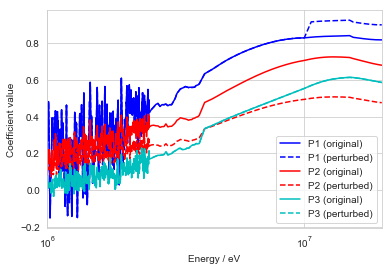

In [19]:
fig, ax = plt.subplots()
ax = lpc.data[1].loc[(mat,mt)].plot(logx=True, label="P1 (original)", style="b-", ax=ax)
ax = lpc1.data[1].loc[(mat,mt)].plot(logx=True, label="P1 (perturbed)", style="b--", ax=ax)
ax = lpc.data[2].loc[(mat,mt)].plot(logx=True, label="P2 (original)", style="r-", ax=ax)
ax = lpc1.data[2].loc[(mat,mt)].plot(logx=True, label="P2 (perturbed)", style="r--", ax=ax)
ax = lpc.data[3].loc[(mat,mt)].plot(logx=True, label="P3 (original)", style="c-", ax=ax)
ax = lpc1.data[3].loc[(mat,mt)].plot(logx=True, label="P3 (perturbed)", style="c--", ax=ax)
ax.set_xlim([1e6, 2e7]);
ax.set_xlabel("Energy / eV");
ax.set_ylabel("Coefficient value");
ax.legend();